# 6.4. Machine Learning / Regression - Global Real Estate Transactions

### Content:

#### 01. Importing libraries and data
#### 02. Data cleaning
#### 03. Data Preparation for Regression Analysis
#### 04. Regression analysis
#### Bonus: Performance Improvement After Removing Outliers

### 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# folder path to main project folder
path = r'C:\Users\ThinkPad T570\Documents\05-2024 OpenData WorldRealEstate Analysis_LazerHF'

In [4]:
# importing prepared World Real Estate dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clean.csv'))

In [5]:
df.head()

,Unnamed: 0,Title,Country,Location,Year,Total_Floors,Apart_Floors,Apart_Rooms,Total_Area,Price,Continent,C-Code,Price_category,Time_Period
0,1,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007,2,3,5,245,274415.0,Europe,5,Middle price,2000-2010
1,4,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023,4,2,4,54,314990.0,Europe,5,Middle price,2010on
2,6,"3 room apartment 72 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",1955,4,4,3,72,122000.0,Europe,5,Middle price,1950-2000
3,7,"3 room apartment 100 m² in Minsk, Belarus",Belarus,"Minsk, Belarus",2013,16,2,3,100,159000.0,Europe,5,Middle price,2010on
4,16,"1 room apartment 55 m² in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2021,6,2,2,55,314122.0,Europe,5,Middle price,2010on


### 02. Data Cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'Title', 'Country', 'Location', 'Year', 'Total_Floors',
       'Apart_Floors', 'Apart_Rooms', 'Total_Area', 'Price', 'Continent',
       'C-Code', 'Price_category', 'Time_Period'],
      dtype='object')

In [7]:
# drop column
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.shape

(15794, 13)

In [9]:
df.dtypes

Title              object
Country            object
Location           object
Year                int64
Total_Floors        int64
Apart_Floors        int64
Apart_Rooms         int64
Total_Area          int64
Price             float64
Continent          object
C-Code              int64
Price_category     object
Time_Period        object
dtype: object

#### Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

Title             0
Country           0
Location          0
Year              0
Total_Floors      0
Apart_Floors      0
Apart_Rooms       0
Total_Area        0
Price             0
Continent         0
C-Code            0
Price_category    0
Time_Period       0
dtype: int64

#### Duplicates

In [13]:
# check for duplicates
dups = df.duplicated()

In [12]:
dups.shape

(15794,)

#### Extreme Values Check

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_11308\3020178489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=25) # Shows extreme values
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

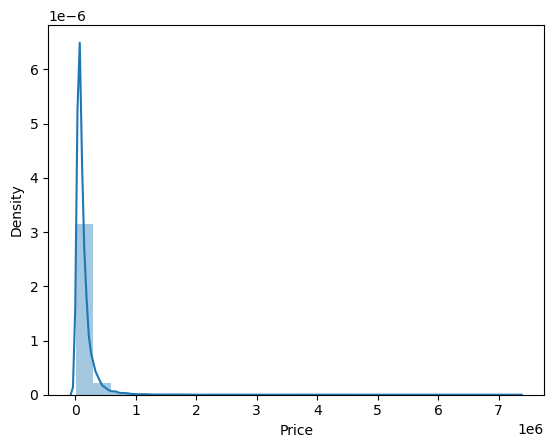

In [14]:
sns.distplot(df['Price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [15]:
df['Price'].mean() # Check the mean

134116.3534886666

In [16]:
df['Price'].median() # Check the median

82900.0

In [17]:
df['Price'].max() # Check the max

7294649.0

In [18]:
df['Price'].min() # Check the min

5000.0

In [21]:
# create a df subset with house prices under 1mio USD
df_price_sub = df[df['Price'] < 1000000]

C:\Users\ThinkPad T570\AppData\Local\Temp\ipykernel_11308\766677012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_sub['Price'], bins=25, kde = True)
C:\Users\ThinkPad T570\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

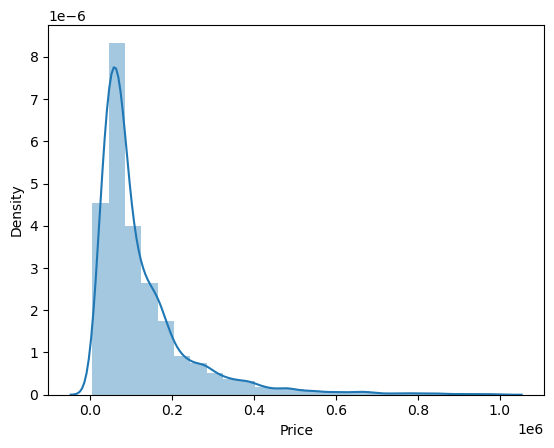

In [24]:
# histogram distribution
sns.distplot(df_price_sub['Price'], bins=25, kde = True)

### 03. Data Preparation for Regression Analysis

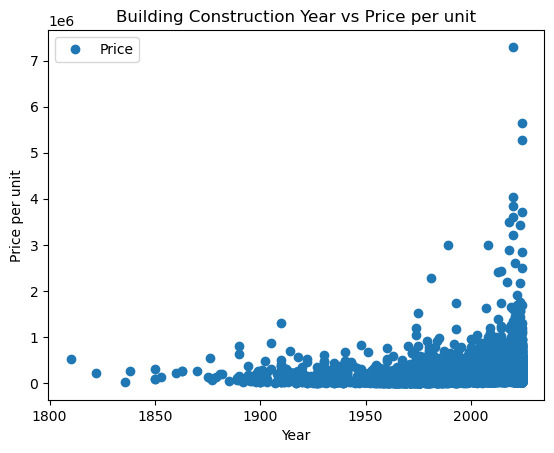

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Building Construction Year vs Price per unit')  
plt.xlabel('Year')  
plt.ylabel('Price per unit')  
plt.show()

#### Hypothesis:

In the upcoming analysis, I aim to explore the hypothesis that there is a correlation between the year of construction and the price of a property. This hypothesis is centered around the notion that the age of a property may have an impact on its market value. It's posited that newer properties may command higher prices due to factors such as modern amenities, architectural designs, or increased construction costs. 

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [30]:
X

array([[2007],
       [2023],
       [1955],
       ...,
       [2023],
       [1910],
       [2023]], dtype=int64)

In [31]:
y

array([[274415.],
       [314990.],
       [122000.],
       ...,
       [113135.],
       [277167.],
       [242970.]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 04. Regression Analysis

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

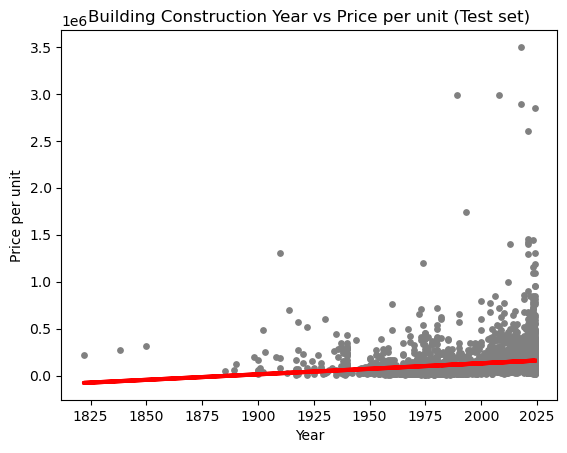

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Building Construction Year vs Price per unit (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price per unit')
plot_test.show()

##### Interpretation:
Upon reviewing the regression analysis, it is apparent that the correlation between the building construction year and the price does not perfectly align with the predicted linear model, represented by the red regression line. Despite our initial hypothesis, an intriguing pattern emerges in the data, particularly in the section representing older buildings (up to the mid-1950s). Here, a considerable number of data points indicate higher prices, deviating from the expected trend. This suggests that factors beyond the construction year might be influencing the price of these older buildings. Such factors could include architectural significance, location, or even historical value. While the overall trend supports a general increase in price with newer buildings, these outliers indicate the complexity of real estate pricing and emphasize the importance of considering a multifaceted approach when analyzing such data.

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1173.62053083]]
Mean squared error:  27779526303.76598
R2 score:  0.017879476146658857


In [39]:
y_predicted

array([[110646.66591947],
       [156417.86662193],
       [ 96563.21954948],
       ...,
       [135292.69706695],
       [158765.1076836 ],
       [158765.1076836 ]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,37000.0,110646.665919
1,92300.0,156417.866622
2,26500.0,96563.219549
3,396729.0,101257.701673
4,73538.0,158765.107684
5,68000.0,93042.357957
6,34920.0,158765.107684
7,46500.0,155244.246091
8,49900.0,116514.768574
9,64500.0,147028.902375


#### Compare how the regression fits the training set

In [41]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1173.62053083]]
Mean squared error:  39938837613.36551
R2 score:  0.020454391342186073


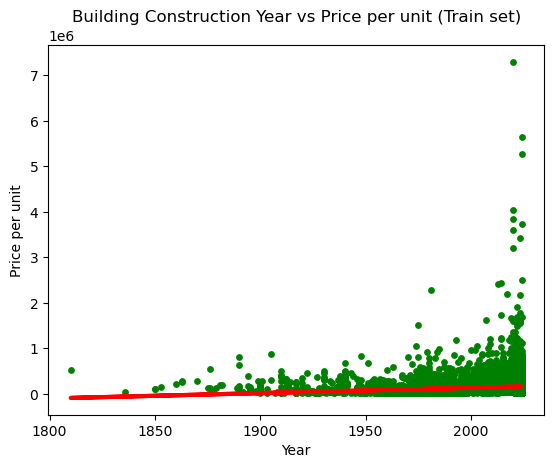

In [44]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Building Construction Year vs Price per unit (Train set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price per unit')
plot_test.show()

#### Bonus: Performance Improvement After Removing Outliers

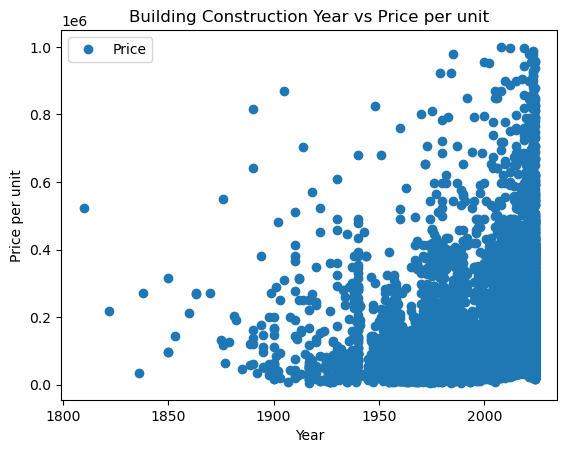

In [45]:
# See how the scatterplot looks without outliers.

df_price_sub.plot(x = 'Year', y='Price', style='o')  
plt.title('Building Construction Year vs Price per unit')  
plt.xlabel('Year')  
plt.ylabel('Price per unit')  
plt.show()

In [46]:
# Reshape again.

X_2 = df_price_sub['Year'].values.reshape(-1,1)
y_2 = df_price_sub['Price'].values.reshape(-1,1)

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [48]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [49]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [50]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[927.65255517]]
Mean squared error:  13397429789.78919
R2 score:  0.03985875044171261


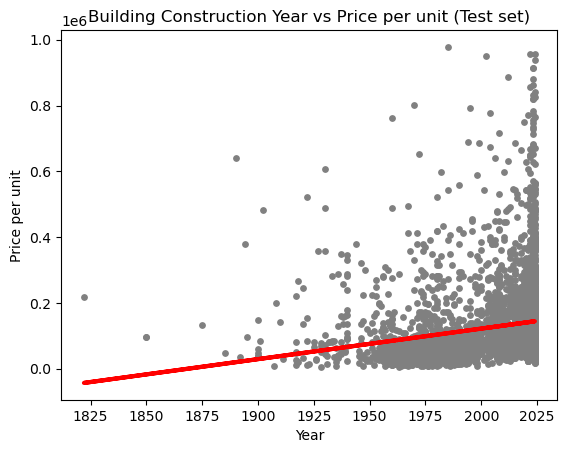

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Building Construction Year vs Price per unit (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Price per unit')
plot_test.show()

In [53]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(20)

,Actual,Predicted
0,178000.0,143386.828295
1,28000.0,96076.547982
2,216299.0,124833.777192
3,91302.0,144314.480850
4,18200.0,90510.632651
5,16500.0,94221.242871
6,27000.0,108136.031199
7,44455.0,63608.708551
8,119705.0,142459.175740
9,41600.0,142459.175740


##### Final Interpretation:
The results from our machine learning regression analysis indicate a poor model performance, as evidenced by the low R2 scores for both our test and training sets. Additionally, a comparison of the actual and predicted values reveals a significant discrepancy, further confirming the model's ineffectiveness.

In particular, the model fails to accurately represent the relationship between "Building Construction Year" and "Price per Unit." It suggests a linear association, but the real-world data does not follow a single, straight regression line. As such, the model's predictions based on this linear assumption are unreliable.

This situation underscores the complexity of real estate pricing. "Price per Unit" or "Price per Transaction" is influenced by numerous factors beyond just the "Building Construction Year." Other variables such as the size, age, and condition of the property, its architectural significance, the local market conditions, and even the property's historical value can significantly impact its price.

Therefore, a more sophisticated, multifaceted approach to the analysis might yield more accurate results. One might considers a model that can capture the non-linear relationships and interactions between multiple variables. It's crucial that the model reflects the complexity of the real estate market to make accurate predictions.